In [125]:
import pandas as pd
datos = pd.read_csv('./housing.csv')
datos = datos.dropna()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'room_density'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'bedrooms_per_rooms'}>],
       [<Axes: title={'center': 'income_per_value'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

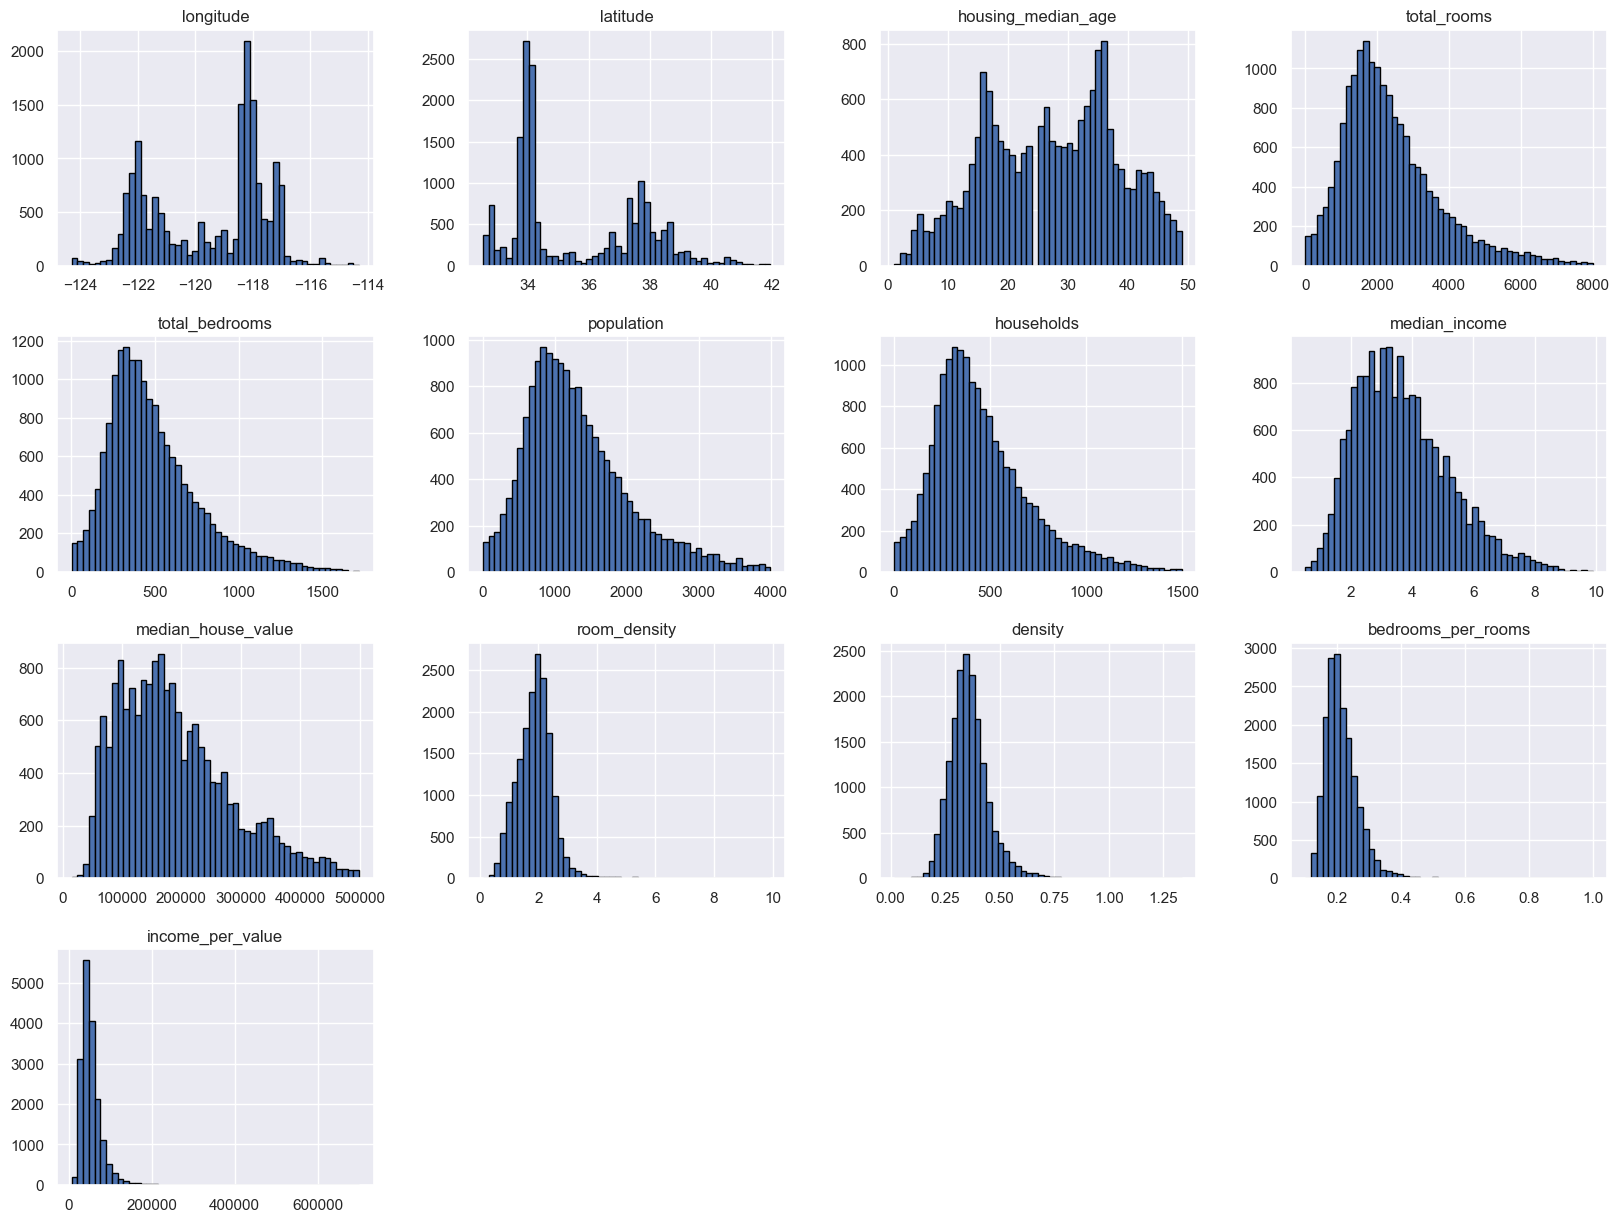

In [126]:

datos = datos[datos["housing_median_age"] < 50]
datos = datos[datos["median_house_value"] < 500000]
datos = datos[datos["total_bedrooms"] < 1750]
datos = datos[datos["total_rooms"] < 8000]
datos = datos[datos["households"] < 1500]
datos = datos[datos["median_income"] < 10]
datos = datos[datos["population"] < 4000]


datos["room_density"] = datos["total_rooms"] / datos["population"]
datos = datos[datos["room_density"] < 10]

datos["density"] = datos["households"] / datos["population"]
datos["bedrooms_per_rooms"] = datos["total_bedrooms"] / datos["total_rooms"]
datos["income_per_value"] = datos["median_house_value"] / datos["median_income"]

datos = datos.drop('ocean_proximity', axis=1)


datos.hist(bins=50, figsize=(20,15), edgecolor='black')


<Axes: >

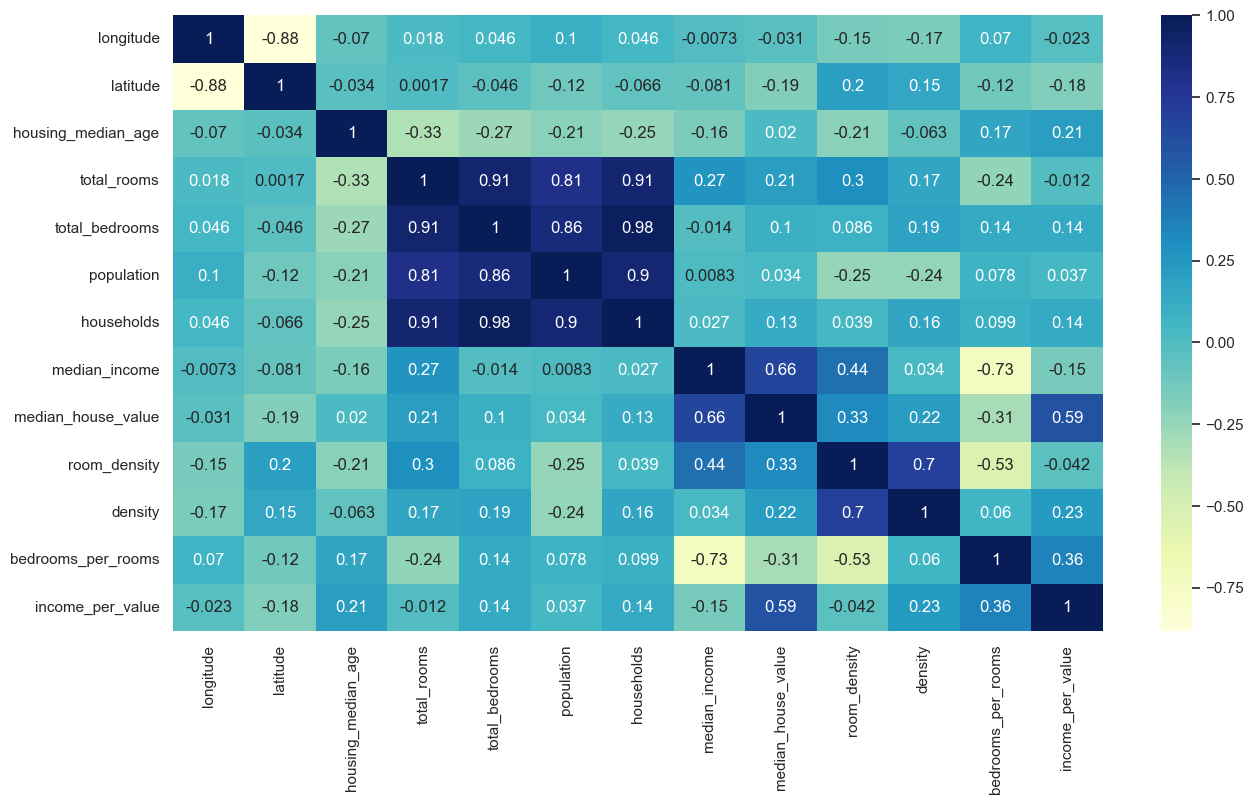

In [127]:
import seaborn as sb

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr('spearman'), annot=True, cmap='YlGnBu' )

In [128]:
y  = datos['median_house_value']
X = datos.drop('median_house_value', axis=1) #axis = 1, para eliminar la columna
     

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


array([[<Axes: title={'center': 'predicciones'}>,
        <Axes: title={'center': 'valor real'}>],
       [<Axes: title={'center': 'diferencia'}>, <Axes: >]], dtype=object)

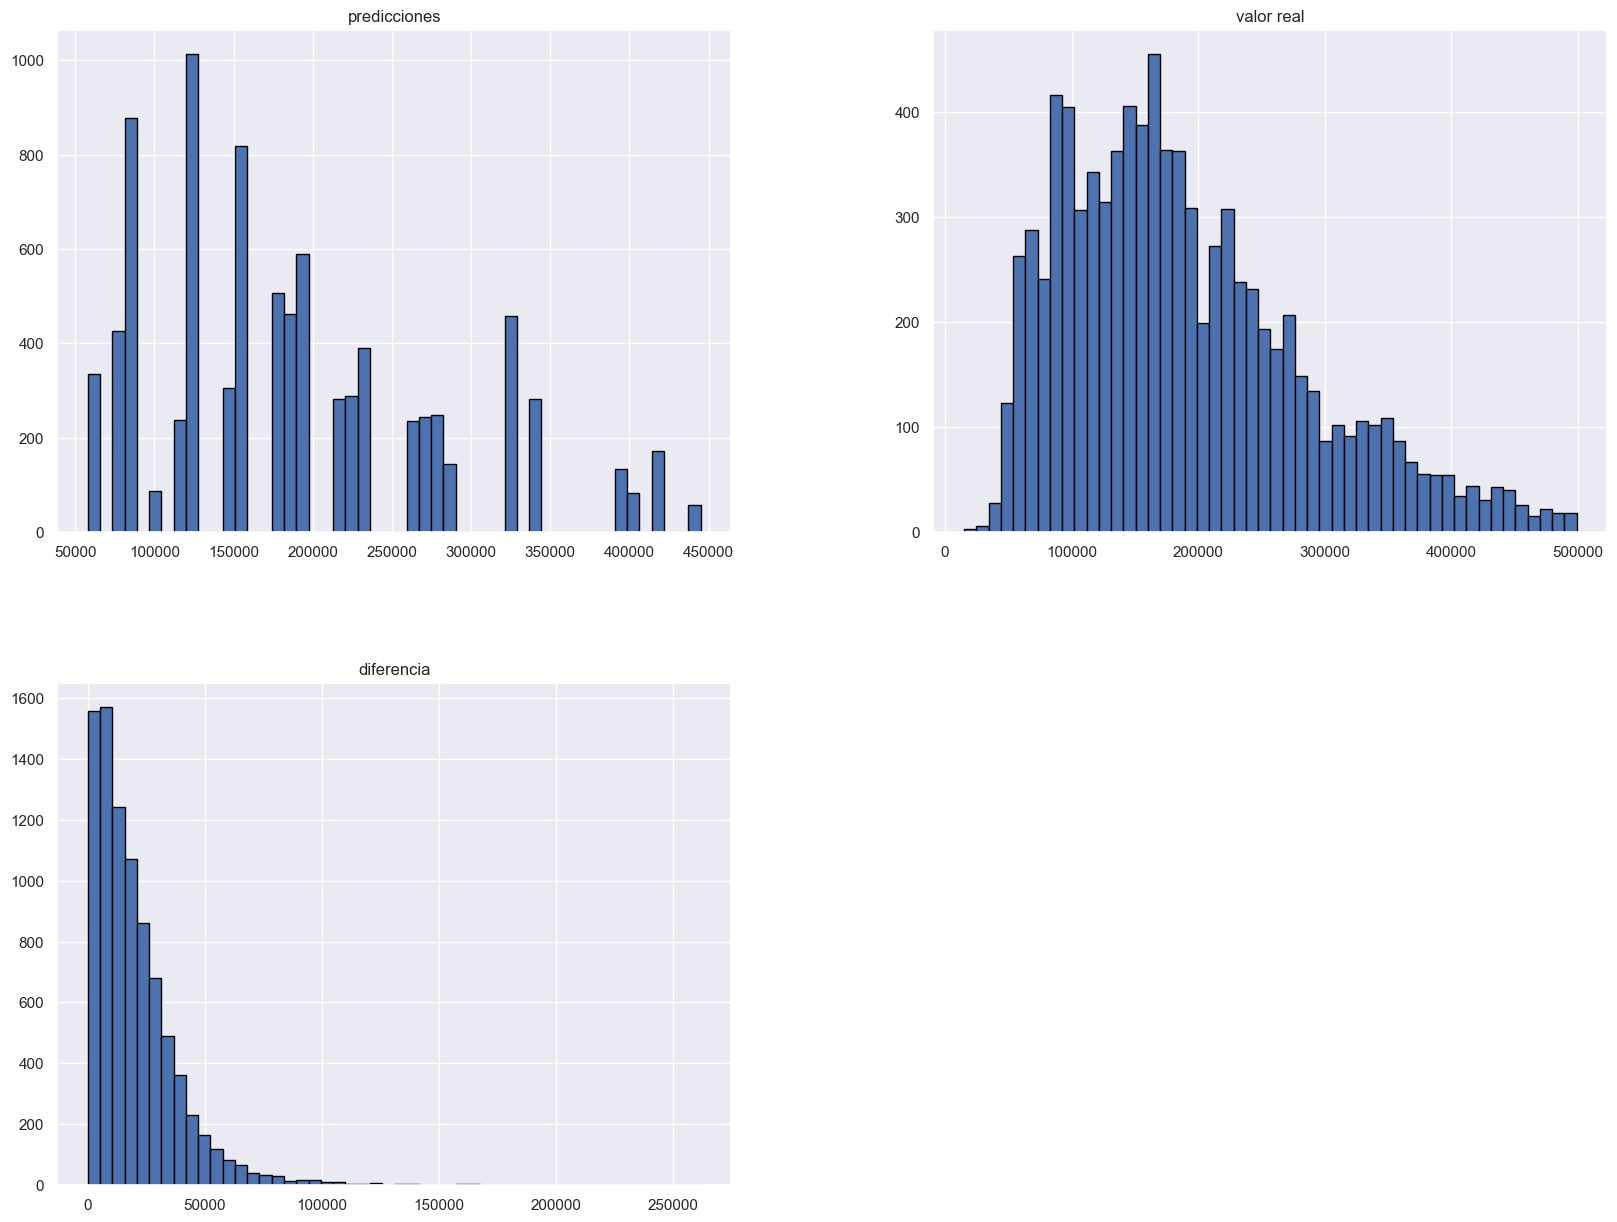

In [129]:
from sklearn.tree import DecisionTreeRegressor

modelTree = DecisionTreeRegressor(max_depth=5) # no depende de la cantidad de caracteristicas
modelTree.fit(X_train, y_train)


prediccionesTree = modelTree.predict(X_test)

comparativa = {"predicciones": prediccionesTree, "valor real": y_test, "diferencia": round(abs(y_test - prediccionesTree))}
result = pd.DataFrame(comparativa)
result = result.sort_values(by="diferencia")
result.to_csv("resultado_ejercicio2.csv")
result.hist(bins=50, figsize=(20,15), edgecolor='black')


In [130]:
modelTree.score(X_test, y_test)

0.9201185661738411

[Text(0.5, 0.9166666666666666, 'median_income <= 4.132\n8945792311.267\n8679\n187954.211'),
 Text(0.25, 0.75, 'income_per_value <= 63649.984\n5587660186.485\n5784\n151854.46'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'income_per_value <= 39739.791\n2110642035.067\n4085\n121800.294'),
 Text(0.0625, 0.4166666666666667, 'median_income <= 2.728\n747667813.222\n1718\n89094.877'),
 Text(0.03125, 0.25, 'median_income <= 2.132\n233618970.249\n755\n68083.177'),
 Text(0.015625, 0.08333333333333333, '100978304.827\n325\n57995.382'),
 Text(0.046875, 0.08333333333333333, '198823313.196\n430\n75707.674'),
 Text(0.09375, 0.25, 'income_per_value <= 30861.943\n533182188.643\n963\n105568.224'),
 Text(0.078125, 0.08333333333333333, '251442463.96\n437\n87268.879'),
 Text(0.109375, 0.08333333333333333, '257911628.367\n526\n120771.293'),
 Text(0.1875, 0.4166666666666667, 'median_income <= 2.684\n1760050982.048\n2367\n145538.319'),
 Text(0.15625, 0.25, 'median_income <= 2

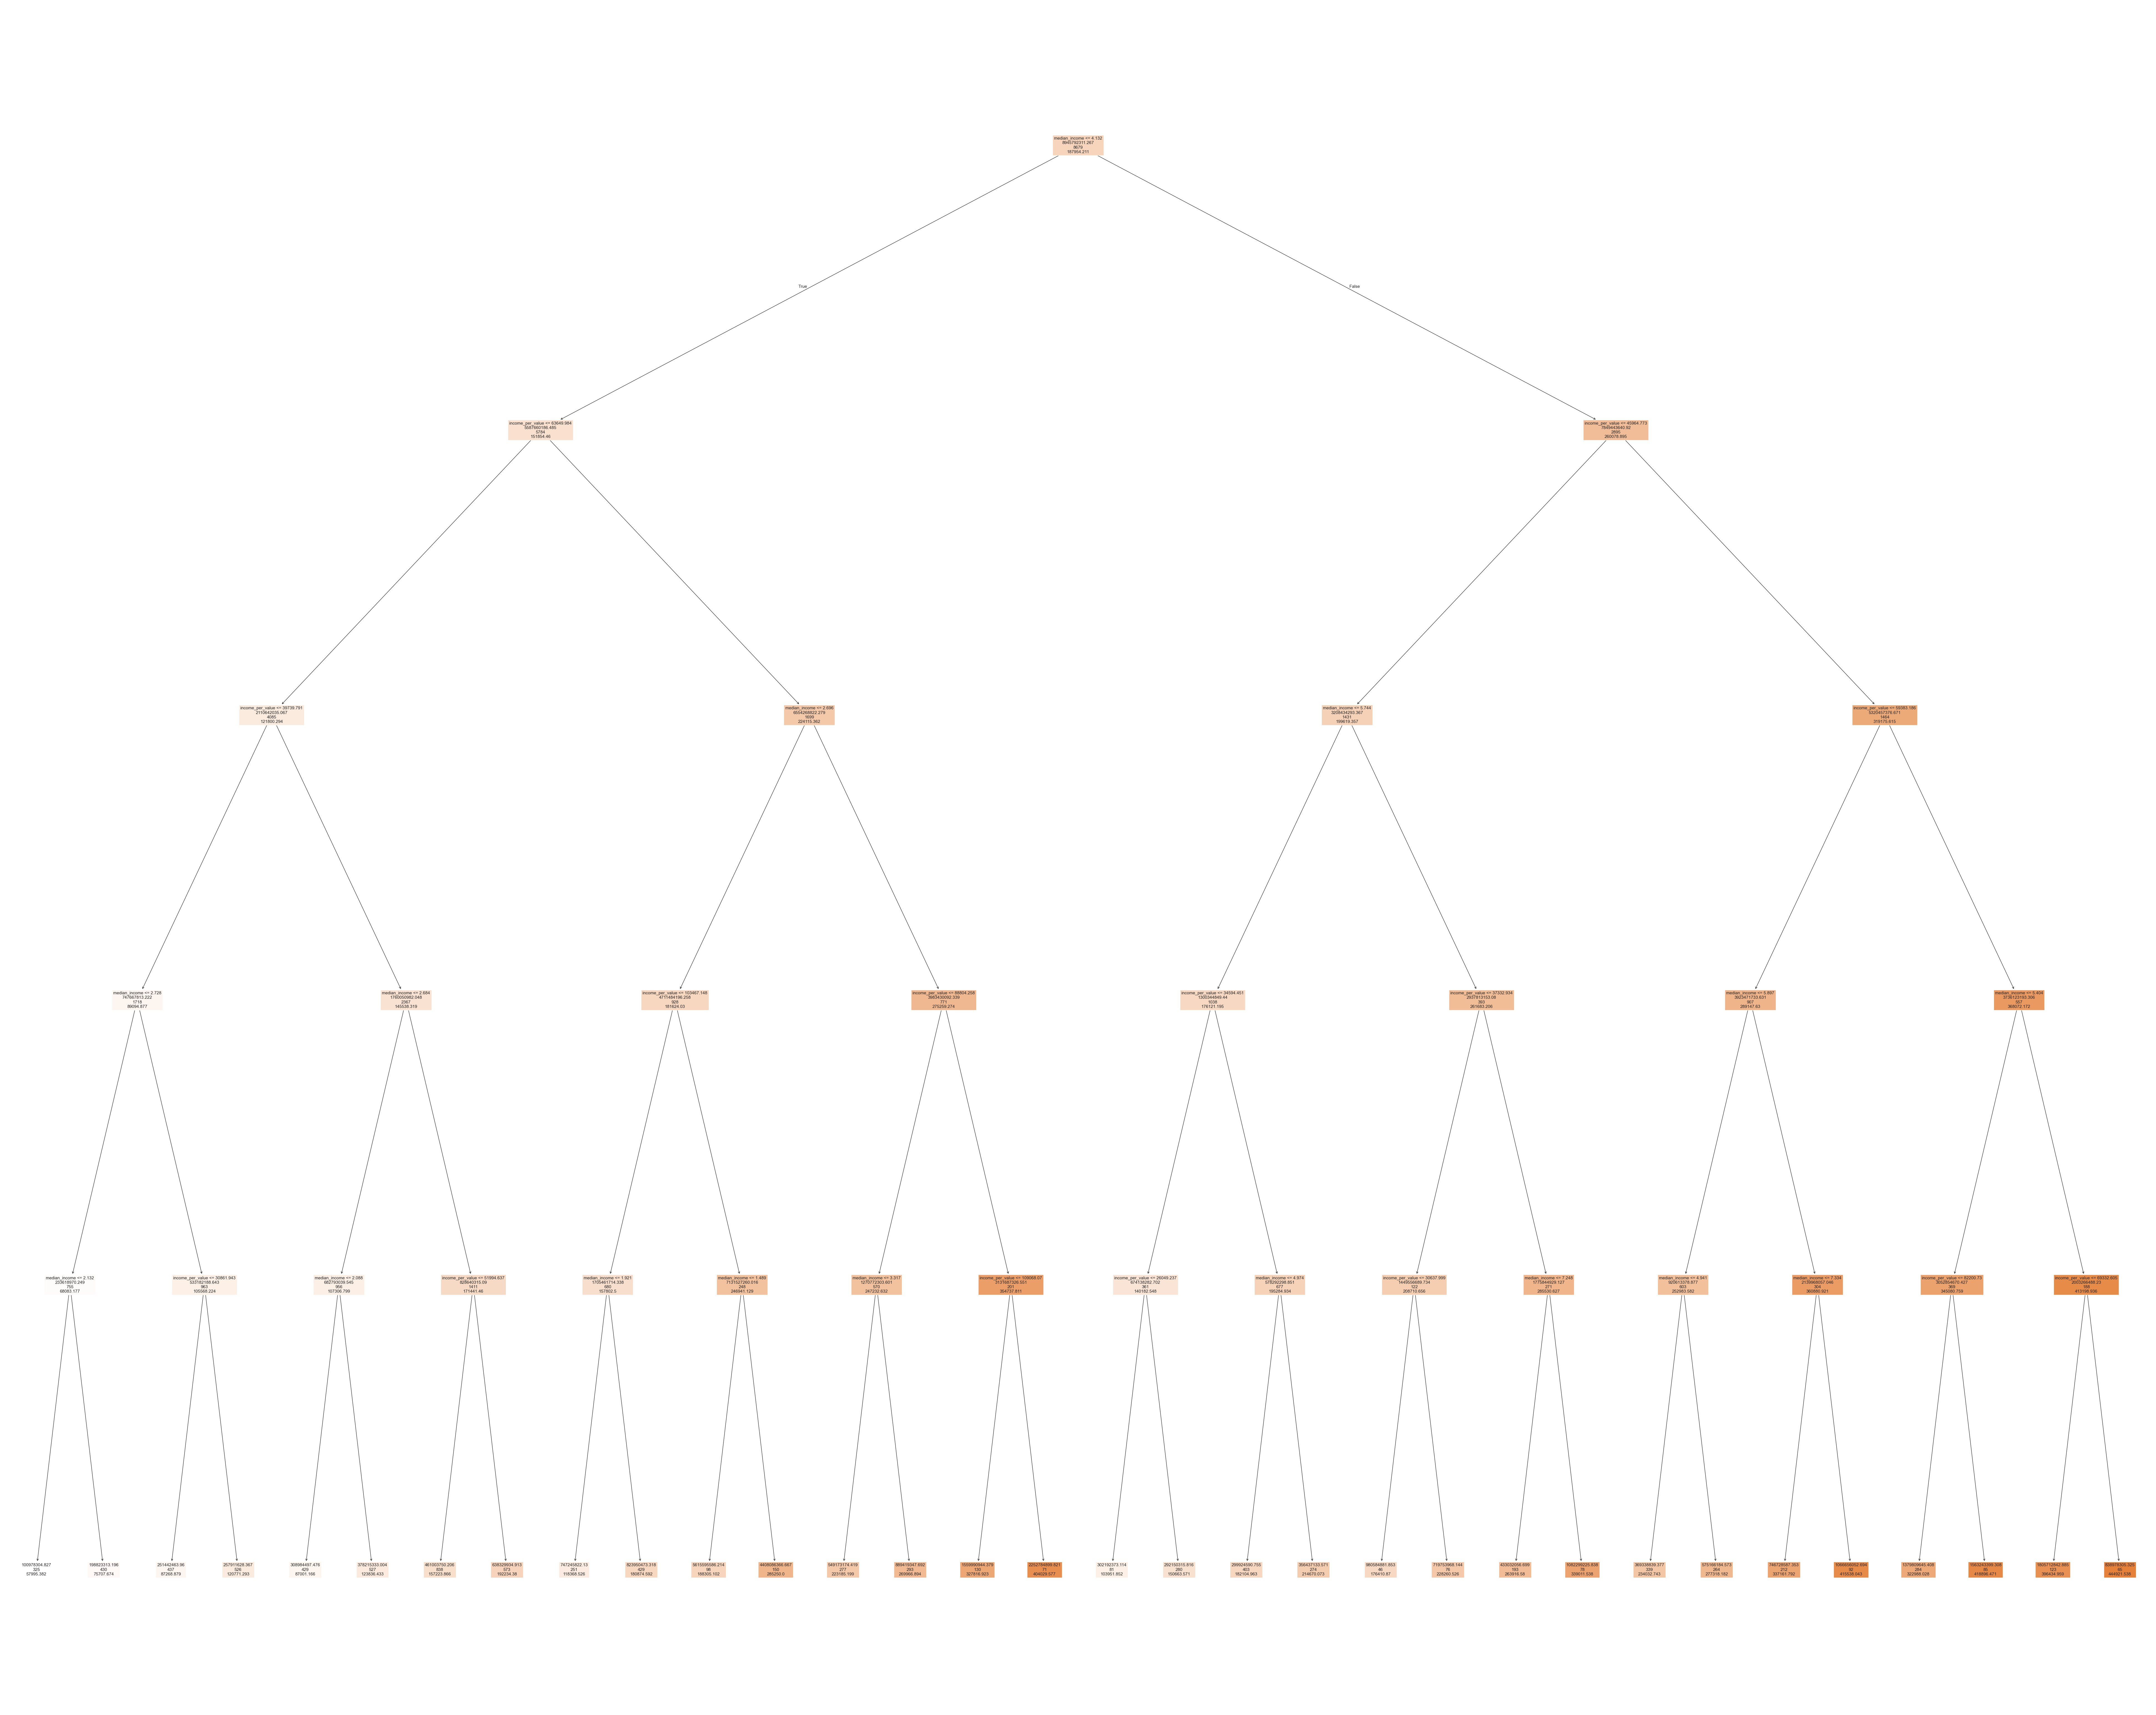

In [131]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelTree,
    feature_names=X_train.columns,
    filled=True,
    label='none'
)

Al utilizar el Decision Tree Regressor obtenemos mejores resultados que con el Linear Regression. El porcentaje aumenta en un 4% aproximadamente. La ventaja de este algoritmo es que nos permite ver qué variables influyen más en la predicción final. Solo que vemos que aquí los resultados se presentan en conjuntos, y no son resultados continuos, como vemos en la grafica de predicciones.